<a href="https://colab.research.google.com/github/Rezi277/Praktikum072-ML/blob/main/Praktikum07_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Latihan-2.ML/Praktikum07.ML/Data/college.csv")
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [ ]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [ ]:
df['Plan'].unique()

array(['plan', 'not plan'], dtype=object)

In [ ]:
# Menampilkan distribusi hasil mapping
df['Plan_bin'] = df['Plan'].map({'plan': 1, 'not plan': 0})
print("\nDistribusi Plan_bin:\n", df['Plan_bin'].value_counts())


Distribusi Plan_bin:
 Plan_bin
0    5404
1    2596
Name: count, dtype: int64


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,StudentID,Parent_income,IQ,Plan_bin
StudentID,1.000000,0.013537,0.024428,0.008579
Parent_income,0.013537,1.000000,0.280201,0.501489
IQ,0.024428,0.280201,1.000000,0.353742
Plan_bin,0.008579,0.501489,0.353742,1.000000


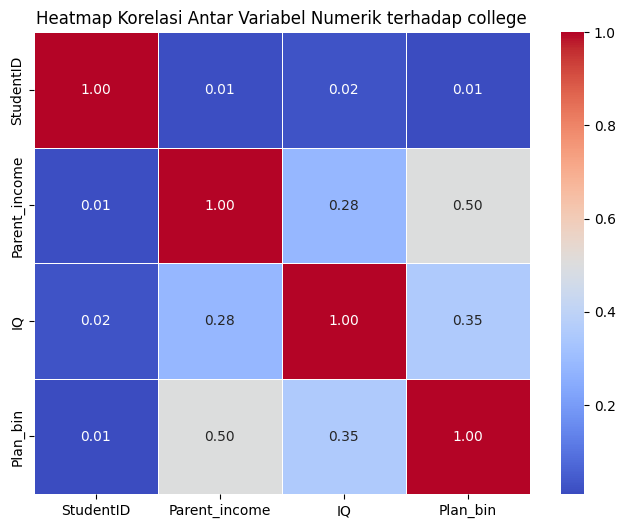

In [ ]:
#Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap college', fontsize=12)
plt.show()

In [ ]:
# Fitur numerik
feature_num = ['StudentID', 'Parent_income', 'IQ']
feature_bin = [] # 'Plan_bin' should be the target, not a feature

# Gabungkan & drop missing
use_cols = feature_num + ['Plan_bin']
df_model = df[use_cols].dropna().copy()

# Pisahkan fitur (X) dan target (y)
X = df_model[feature_num]
y = df_model['Plan_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8000, 3)
y shape: (8000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (6400, 3)
Data uji: (1600, 3)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Scale hanya fitur numerik, gender langsung passthrough
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'
)

# Inisialisasi model Logistic Regression
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

# Pipeline: preprocessing + model
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model
clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")

✅ Model Logistic Regression berhasil dilatih.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prediksi & probabilitas
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Hitung metrik evaluasi
print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi   : 0.7450
Precision : 0.5869
Recall    : 0.7225
F1-Score  : 0.6477
ROC-AUC   : 0.8216


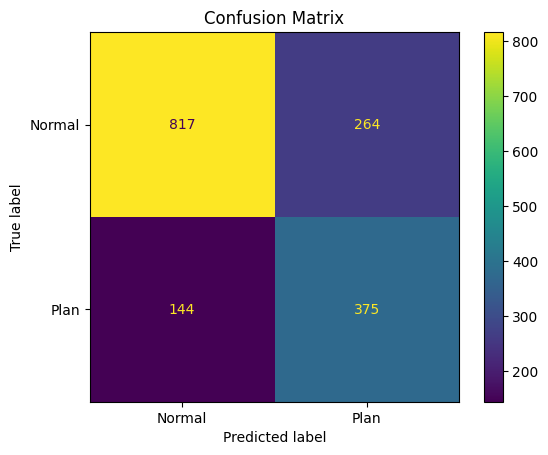

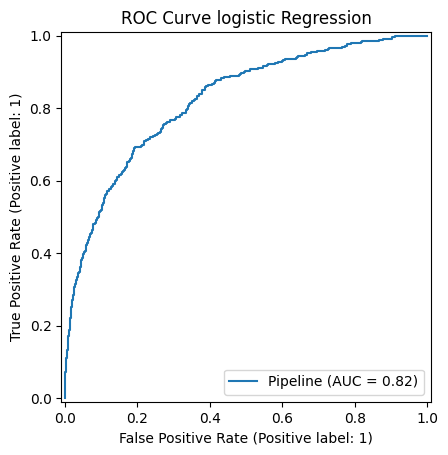

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
display_labels=['Normal', 'Plan']
).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()
# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['not plan (0)', 'plan (1)']))

              precision    recall  f1-score   support

not plan (0)       0.85      0.76      0.80      1081
    plan (1)       0.59      0.72      0.65       519

    accuracy                           0.74      1600
   macro avg       0.72      0.74      0.72      1600
weighted avg       0.76      0.74      0.75      1600



In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, X, y, cv=5)

# Tampilkan hasil cross validation
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.748125 0.778125 0.751875 0.768125 0.745625]
Rata-rata akurasi: 0.758375
Standar deviasi: 0.01260952021291847


In [ ]:
# Ambil nama fitur & koefisien
feat_names = feature_num + feature_bin
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
1,Parent_income,1.216774,3.376279
2,IQ,0.694261,2.002229
0,StudentID,-0.023922,0.976362


In [ ]:
# Contoh 2 anak
data_baru = pd.DataFrame({
    'StudentID': [0, 0],
    'IQ': [150, 100],
    'Parent_income': [80000, 30000],
})
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_Plan'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred
display(hasil)

,StudentID,IQ,Parent_income,Prob_Plan,"Pred (0=Tidak,1=Ya)"
0,0,150,80000,0.985881,1
1,0,100,30000,0.273863,0
